# Importing Libraries

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Reading data

In [410]:
data = pd.read_csv('data/train.csv')
data
test = pd.read_csv('data/test.csv')
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


# Dropping Null values

In [411]:
crap = ['Id']
for col in data.columns:
    null_prop = data[col].isna().sum()/len(data)
    if null_prop >= 0.2:
        print(col, null_prop)
        crap.append(col)

Alley 0.9376712328767123
FireplaceQu 0.4726027397260274
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137


In [412]:
data.drop(columns= crap, inplace=True)
test.drop(columns= crap, inplace=True)

# Applying Linear regression with sklearn

In [415]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Splitting data into features and labels

In [417]:
x = data.drop(columns=['SalePrice'])
y = data['SalePrice']
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state=42)

### Training a regression model

In [394]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [395]:
y_train_p = reg.predict(x_train)
y_val_p = reg.predict(x_val)

### Evaluation

In [396]:
print("Train MSE: ", mean_squared_error(y_train_p, y_train))
print("Val MSE: ", mean_squared_error(y_val_p, y_val))

Train MSE:  917661684.3135035
Val MSE:  1158503357.6317515


In [397]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

# Applying Random forest

### Train a random forest model

In [399]:
reg = RandomForestRegressor(n_estimators=1000, max_depth=80, n_jobs=-1)

In [400]:
reg.fit(x_train, y_train)

RandomForestRegressor(max_depth=80, n_estimators=1000, n_jobs=-1)

In [401]:
y_train_p = reg.predict(x_train)
y_val_p = reg.predict(x_val)

In [402]:
print("Train MSE: ", mean_squared_error(y_train_p, y_train))
print("Val MSE: ", mean_squared_error(y_val_p, y_val))

Train MSE:  120826957.38871653
Val MSE:  819668257.9999264


In [418]:
reg = GradientBoostingRegressor(n_estimators=1000)
reg.fit(x_train, y_train)
y_train_p = reg.predict(x_train)
y_val_p = reg.predict(x_val)
print("Train MSE: ", mean_squared_error(y_train_p, y_train))
print("Val MSE: ", mean_squared_error(y_val_p, y_val))

Train MSE:  7285883.328805533
Val MSE:  796061697.564033


### Evaluation

In [419]:
y_pred = reg.predict(test)

In [420]:
y_pred

array([128034.63629939, 168662.00210181, 184713.23581079, ...,
       159507.14956696, 119229.81654065, 215648.62884821])

In [421]:
df = pd.read_csv('data/test.csv')

In [422]:
sub = pd.DataFrame()

In [423]:
sub['Id']=df['Id']
sub['SalePrice']=y_pred

In [425]:
sub.to_csv('sub_q.csv')

In [426]:
sub

,Id,SalePrice
0,1461,128034.636299
1,1462,168662.002102
2,1463,184713.235811
3,1464,185487.587893
4,1465,187728.295934
...,...,...
1454,2915,75393.010054
1455,2916,70500.432308
1456,2917,159507.149567
1457,2918,119229.816541


# Applying support vector machine

In [219]:
from sklearn.svm import SVR

### Training the model

In [328]:
reg = SVR(kernel='rbf', degree=5)
reg.fit(x_train, y_train)

SVR(degree=5)

In [329]:
y_train_p = reg.predict(x_train)
y_val_p = reg.predict(x_val)

In [330]:
print("Train MSE: ", mean_squared_error(y_train_p, y_train))
print("Val MSE: ", mean_squared_error(y_val_p, y_val))

Train MSE:  6487550909.998427
Val MSE:  7033456282.653773


## Plotting actual vs predicted for linear regression

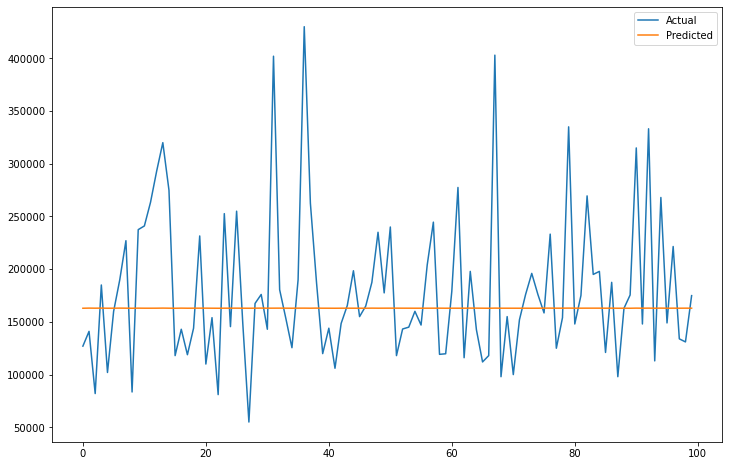

In [331]:
l=0
r=100
x = list(range(len(x_val)))[l:r]
plt.figure(figsize=(12, 8))
plt.plot(x, y_val[l:r], label = 'Actual')
plt.plot(x, y_val_p[l:r], label = 'Predicted')
plt.legend()
plt.show()

In [ ]:
1986721829
596433383